In [2]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=8, n_workers=6, memory_limit='128GB')

# Using intake-esm on mistral
- install intake-esm: https://intake-esm.readthedocs.io/en/latest/installation.html
- check the already built catalogs: /home/mpim/m300524/.intake_esm/collections and copy to skip long catalog building process

In [3]:
!ls -all /home/mpim/m300524/.intake_esm/collections/mpige

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
total 161568
drwxr-xr-x 2 m300524 mpioes      4096 Apr 25 11:20 .
drwxr-xr-x 5 m300524 mpioes      4096 Apr 26 10:14 ..
-rw-r--r-- 1 m300524 mpioes 153577127 Apr 25 16:11 mistral_mpi-ge_all.mpige.csv
-rw-r--r-- 1 m300524 mpioes   2256611 Apr 24 10:45 mistral_mpi-ge.mpige.csv
-rw-r--r-- 1 m300524 mpioes   9560266 Apr 12 10:50 mpi-ge.mpige.csv
-rw-r--r-- 1 m300524 mpioes     29025 Apr 24 09:55 mpige_test.mpige.csv


In [45]:
import intake
import xarray as xr
import numpy as np
import pandas as pd

# MPI Grand Ensemble
## renamed output
hosted at /work/mh1007/MPI-GE

In [72]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/collection_input_mpim_ge.yml'
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [83]:
number_of_files_per_year = 1
for c in ['stream','component','ensemble','experiment']:
    u = col.df[c].unique()
    if c not in ['stream','experiment']:
        number_of_files_per_year = number_of_files_per_year * len(u)
    print(c,u,len(u))
print('number_of_files_per_year:',number_of_files_per_year)

stream ['timeser_mm' 'data_3d_mm' 'data_moc_mm' 'monitoring_ym' 'data_2d_mm'
 'data_3d_ym' 'data_sedi_ym' 'data_eu_mm' 'co2'] 9
component ['mpiom' 'hamocc'] 2
ensemble [100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1] 100
experiment ['onepct' 'rcp85' 'rcp45' 'rcp26' 'hist' 'pictrl'] 6
number_of_files_per_year: 200


In [73]:
col.df.head()

,resource,resource_type,direct_access,experiment,case,component,stream,date_range,ensemble,file_fullpath,file_basename,file_dirname,ctrl_branch_year,year_offset,sequence_order,grid
0,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,timeser_mm,18850101-18851231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_timeser_mm_18850101_18851231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
1,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_3d_mm,18770101-18771231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_3d_mm_18770101_18771231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
2,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_moc_mm,18800101-18801231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_moc_mm_18800101_18801231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
3,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,monitoring_ym,19960101-19961231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_monitoring_ym_19960101_199612...,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN
4,MISTRAL-DATA:posix:/work/mh1007/MPI-GE/onepct,posix,True,onepct,onepct0100,mpiom,data_3d_mm,19710101-19711231,100,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,onepct0100_mpiom_data_3d_mm_19710101_19711231.nc,/work/mh1007/MPI-GE/onepct/onepct0100/outdata/...,NaN,NaN,0,NaN


In [74]:
col.df['stream'].unique()

array(['timeser_mm', 'data_3d_mm', 'data_moc_mm', 'monitoring_ym',
       'data_2d_mm', 'data_3d_ym', 'data_sedi_ym', 'data_eu_mm', 'co2'],
      dtype=object)

## monitoring example

In [75]:
cat = col.search(component=['mpiom','hamocc'], stream='monitoring_ym',experiment=['hist'],ensemble=[1,3])

In [78]:
def preprocess(ds,varnamelist=['gmsl_st','global_surface_alkalinity'],drop_coords=['lon','lat','depth']):
    new_ds = []
    for v in varnamelist:
        #print(v)
        if v in ds:
            n_ds = ds[v].squeeze().drop(drop_coords)            
            new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [81]:
def cat_to_xarray(cat,preprocess=None,merge=False,concat=False):
    grouped = cat.query_results.groupby(['experiment'])
    ds = xr.Dataset()
    all_dsets = []
    for dset_keys, dset_files in grouped:
        dset_id = dset_keys
        exp_dsets = []
        for comp_id, comp_files in dset_files.groupby('component'):
            member_ids = []
            member_dsets = []
            for m_id, m_files in comp_files.groupby('ensemble'):
                files = m_files['file_fullpath']
                #print(m_id,comp_id,files[0],files[0])
                if preprocess is not None:
                    ds = xr.open_mfdataset(files,preprocess=preprocess,concat_dim='time')
                else:
                    ds = xr.open_mfdataset(files)
                member_dsets.append(ds)
                member_ids.append(m_id)

            _ds = xr.concat(member_dsets, 'member')
            _ds['member'] = member_ids
            exp_dsets.append(_ds)
        all_dsets.append(xr.merge(exp_dsets))
    if merge:
        return xr.merge(all_dsets)
    elif concat:
        all_dsets = xr.concat(all_dsets,'ext')
        #all_dsets['ext']=grou
        return all_dsets
    else:
        return all_dsets

varnamelist=['global_OM_export_at_90m','global_net_co2_flux']
def preprocess(ds,varnamelist=varnamelist,drop_coords=['lon','lat','depth']):
    new_ds = []
    for v in varnamelist:
        if v in ds:
            n_ds = ds[v].squeeze().drop(drop_coords)            
            new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

%time all_dsets = cat_to_xarray(cat,preprocess=preprocess,merge=True)

CPU times: user 20.7 s, sys: 2.82 s, total: 23.5 s
Wall time: 34.3 s


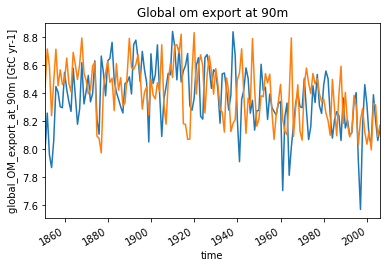

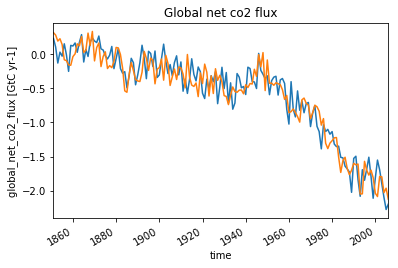

In [82]:
import matplotlib.pyplot as plt
for v in varnamelist:
    d=all_dsets[v]#.isel(time=slice(0,2))
    longname=d.attrs['long_name']
    unit='['+d.attrs['units']+']'
    ylabel=' '.join([v,unit])
    d.to_dataframe().unstack(0)[v].plot(legend=False,title=longname)
    plt.ylabel(ylabel)
    plt.show()

## data_2d_mm example

In [84]:
cat = col.search(component=['mpiom'], stream='data_2d_mm',experiment=['hist'],ensemble=[1,2])

In [85]:
%time ds = cat.to_xarray()


CPU times: user 1min 23s, sys: 19.2 s, total: 1min 42s
Wall time: 3min 7s


In [87]:
ds

<xarray.Dataset>
Dimensions:          (depth: 1, depth_2: 1, depth_3: 1, member_id: 2, time: 1872, x: 256, x_2: 256, x_3: 256, x_4: 256, y: 220, y_2: 220, y_3: 220, y_4: 220)
Coordinates:
    lon              (y, x) float64 -47.25 -47.69 -48.12 ... 131.3 132.5 133.8
    lat              (y, x) float64 76.36 76.3 76.24 ... -77.25 -77.39 -77.54
    lon_2            (y_2, x_2) float64 -47.36 -47.78 -48.2 ... 133.5 133.5
    lat_2            (y_2, x_2) float64 76.28 76.22 76.16 ... -77.33 -77.33
    lon_3            (y_3, x_3) float64 -47.48 -47.91 -48.34 ... 133.2 134.4
    lat_3            (y_3, x_3) float64 76.33 76.27 76.21 ... -77.47 -77.61
    lon_4            (y_4, x_4) float64 -47.37 -47.82 -48.26 ... 132.5 133.8
    lat_4            (y_4, x_4) float64 76.41 76.35 76.29 ... -77.39 -77.54
  * depth            (depth) float64 0.0
  * depth_2          (depth_2) float64 0.0
  * depth_3          (depth_3) float64 6.0
  * time             (time) datetime64[ns] 1850-01-31T23:15:00 ... 200

In [88]:
ds.nbytes/1e9

36.271897256

In [92]:
v='sst'
%time t=ds[v].squeeze().groupby('time.year').mean('time').rename({'year':'time'}).isel(time=[1,2,3,-3,-2,-1]).std('member_id').compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/reductions.py:408: RuntimeWarning: invalid value encountered in true_divide
  u = total / n


CPU times: user 1.18 s, sys: 822 ms, total: 2 s
Wall time: 2.79 s


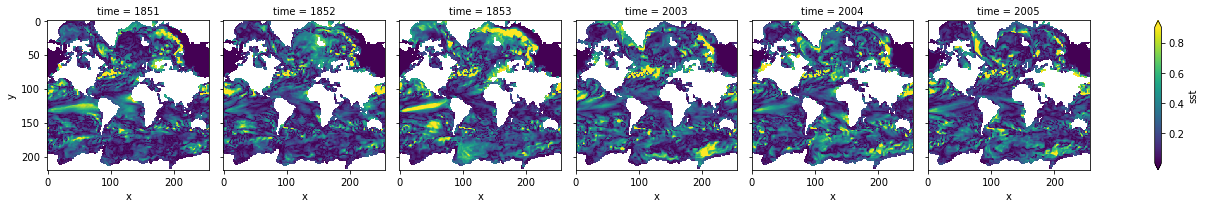

In [94]:
t.plot(robust=True,col='time',yincrease=False)

## data_3d_ym example

In [95]:
cat = col.search(component=['hamocc'], stream='data_3d_ym',experiment='hist',ensemble=[1,3])

In [96]:
%time ds = cat.to_xarray()


CPU times: user 27.7 s, sys: 6.39 s, total: 34.1 s
Wall time: 49.9 s


In [97]:
ds.nbytes/1e9

53.419296304

In [98]:
v='oxygen'
%time t=ds.isel(depth=14)[v].isel(time=[1,2,3,-3,-2,-1]).std('member_id').compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/reductions.py:408: RuntimeWarning: invalid value encountered in true_divide
  u = total / n
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 713 ms, sys: 673 ms, total: 1.39 s
Wall time: 1.55 s


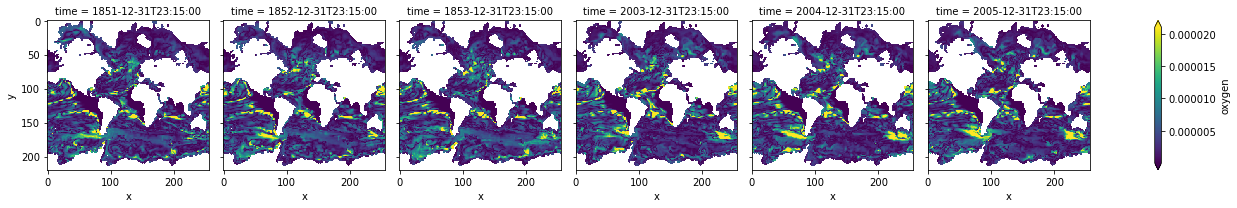

In [99]:
t.plot(robust=True,col='time',yincrease=False)

## example combining RCPs

In [100]:
def cat_to_xarray(cat,preprocess=None,merge=True,concat_ext=False,concat_time=False):
    grouped = cat.query_results.groupby(['experiment'])
    ds = xr.Dataset()
    all_dsets = []
    for dset_keys, dset_files in grouped:
        dset_id = dset_keys
        exp_dsets = []
        for comp_id, comp_files in dset_files.groupby('component'):
            member_ids = []
            member_dsets = []
            for m_id, m_files in comp_files.groupby('ensemble'):
                files = m_files['file_fullpath']
                if preprocess is not None:
                    ds = xr.open_mfdataset(files,preprocess=preprocess,concat_dim='time')
                else:
                    ds = xr.open_mfdataset(files)
                member_dsets.append(ds)
                member_ids.append(m_id)

            _ds = xr.concat(member_dsets, 'member')
            _ds['member'] = member_ids
            exp_dsets.append(_ds)
        all_dsets.append(xr.merge(exp_dsets))
    # comments to explain lazy behaviour
    if merge:
        return xr.merge(all_dsets) # when only streams are different
    elif concat_ext: # when experiments = ['rcp26','rcp45','rcp85']
        all_dsets = xr.concat(all_dsets,'ext')
        return all_dsets
    elif concat_time: # when experiments = ['hist','rcpxx']
        all_dsets = xr.concat(all_dsets,'time')
        return all_dsets
    else:
        return all_dsets

In [103]:
cat = col.search(component='hamocc', stream='monitoring_ym',experiment=['rcp26','rcp45'],ensemble=list(np.arange(1,3)))

In [111]:
varnamelist=['global_OM_export_at_90m','global_net_co2_flux']
drop_dims = ['lon','lat','depth']
def preprocess(ds,varnamelist=varnamelist,drop_coords=drop_dims):
    new_ds = []
    if varnamelist is None: # get all
        return ds.squeeze().drop(drop_coords)
    elif len(varnamelist) is 1:
        return ds[varnamelist[0]].squeeze().drop(drop_coords).to_dataset()
    else:
        for v in varnamelist:
            if v in ds:
                n_ds = ds[v].squeeze().drop(drop_coords)            
                new_ds.append(n_ds)
    new_ds = xr.merge(new_ds)
    return new_ds

In [112]:
%time ds = cat_to_xarray(cat,preprocess=preprocess,concat_ext=True,merge=False)

CPU times: user 10.3 s, sys: 537 ms, total: 10.8 s
Wall time: 10.3 s


In [113]:
ds

<xarray.Dataset>
Dimensions:                  (ext: 2, member: 2, time: 94)
Coordinates:
  * time                     (time) datetime64[ns] 2006-12-31T23:15:00 ... 2099-12-31T23:15:00
  * member                   (member) int64 1 2
Dimensions without coordinates: ext
Data variables:
    global_OM_export_at_90m  (ext, member, time) float32 dask.array<shape=(2, 2, 94), chunksize=(1, 1, 1)>
    global_net_co2_flux      (ext, member, time) float32 dask.array<shape=(2, 2, 94), chunksize=(1, 1, 1)>

# cmorized MPI-GE

columns are a bit mixed up.

In [10]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/mpige_cmorized_mistral.yml'
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [11]:
col.df.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
0,CMIP5,r097i2005p3,prsn,prsn_Amon_MPI-ESM_rcp85_r097i2005p3_200601-209...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,r097i2005p3,mon,Amon,atmos,v20190123,rcp85,200601-209912,prsn,v20190123
1,CMIP5,r080i2005p3,tran,tran_Lmon_MPI-ESM_rcp45_r080i2005p3_200601-209...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,r080i2005p3,mon,Lmon,land,v20190123,rcp45,200601-209912,tran,v20190123
2,CMIP5,r039i2005p3,tran,tran_Lmon_MPI-ESM_rcp45_r039i2005p3_200601-209...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,r039i2005p3,mon,Lmon,land,v20190123,rcp45,200601-209912,tran,v20190123
3,CMIP5,r048i2005p3,tran,tran_Lmon_MPI-ESM_rcp45_r048i2005p3_200601-209...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,r048i2005p3,mon,Lmon,land,v20190123,rcp45,200601-209912,tran,v20190123
4,CMIP5,r004i2005p3,tran,tran_Lmon_MPI-ESM_rcp45_r004i2005p3_200601-209...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,/work/mh1007/CMOR/MPI-GE/output1/MPI-M/MPI-ESM...,r004i2005p3,mon,Lmon,land,v20190123,rcp45,200601-209912,tran,v20190123


In [14]:
for v in ['experiment','ensemble_member','institute','model','product','variable']:
    print(v,col.df[v].unique(),'\n')

experiment ['prsn' 'tran' 'clt' 'snw' 'cVeg' 'nep' 'nppTree' 'nppLut' 'rlut'
 'pastureFrac' 'cSoilLut' 'raShrub' 'gpp' 'mrso' 'hfss' 'cLitterGrass'
 'rh' 'baresoilFrac' 'mrros' 'ra' 'lai' 'nppGrass' 'hfls' 'rlus'
 'cSoilTree' 'vegFrac' 'nwdFracLut' 'gppGrass' 'gppShrub' 'c4PftFrac'
 'cropFrac' 'shrubFrac' 'sfcWind' 'snc' 'cropFracC3' 'nbp' 'tas' 'cSoil'
 'cLitterLut' 'fFire' 'cVegShrub' 'cVegTree' 'ts' 'rhShrub' 'cSoilShrub'
 'raGrass' 'cLitterShrub' 'cLitterTree' 'laiLut' 'gppLut' 'c3PftFrac'
 'evspsbl' 'treeFrac' 'mrsol' 'rhLut' 'pastureFracC3' 'cSoilGrass'
 'rhSoil' 'co2mass' 'gppTree' 'rlds' 'tsl' 'nppShrub' 'fLuc'
 'pastureFracC4' 'rhTree' 'rsut' 'raLut' 'pr' 'cLand' 'vas' 'wap' 'rsus'
 'uas' 'sic' 'sit' 'vo' 'snd' 'zg' 'rlutcs' 'rsdt' 'ta' 'tauu' 'psl'
 'clivi' 'clwvi' 'tauv' 'hus' 'so' 'thetao' 'vmo' 'uo' 'prw' 'wmo' 'umo'
 'et' 'cropFracC4' 'mrsos' 'rsds' 'grassFracC4' 'cLitter' 'cVegLut'
 'grassFrac' 'rhGrass' 'cVegGrass' 'mrro' 'npp' 'raTree' 'snm' 'fracLut'
 'grassFracC3' 'p

In [21]:
cat = col.search(variable='cLand',product='historical')

In [24]:
cat.query_results[['ensemble_member']].size

100

In [23]:
ds = cat.to_xarray()

In [39]:
DS = xr.concat([ds[k] for k in list(ds.keys())],'member')

In [46]:
DS['time']=pd.date_range(start='1850',periods=DS.time.size,freq='M')

In [47]:
DS['member']=np.arange(1,1+DS.member.size)

In [48]:
DS.nbytes/1e9

13.80189968

In [63]:
dl = DS.isel(time=slice(-12*5,None)).std('member').mean('time')['cLand'].compute()

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/reductions.py:408: RuntimeWarning: invalid value encountered in true_divide
  u = total / n
/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [64]:
de = DS.isel(time=slice(0,12*5)).std('member').mean('time')['cLand'].compute()

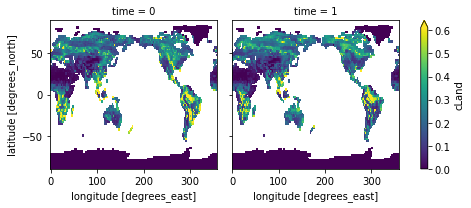

In [66]:
xr.concat([de,dl],'time').plot(col='time',robust=True)

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


CPU times: user 42.5 s, sys: 32.7 s, total: 1min 15s
Wall time: 52.7 s


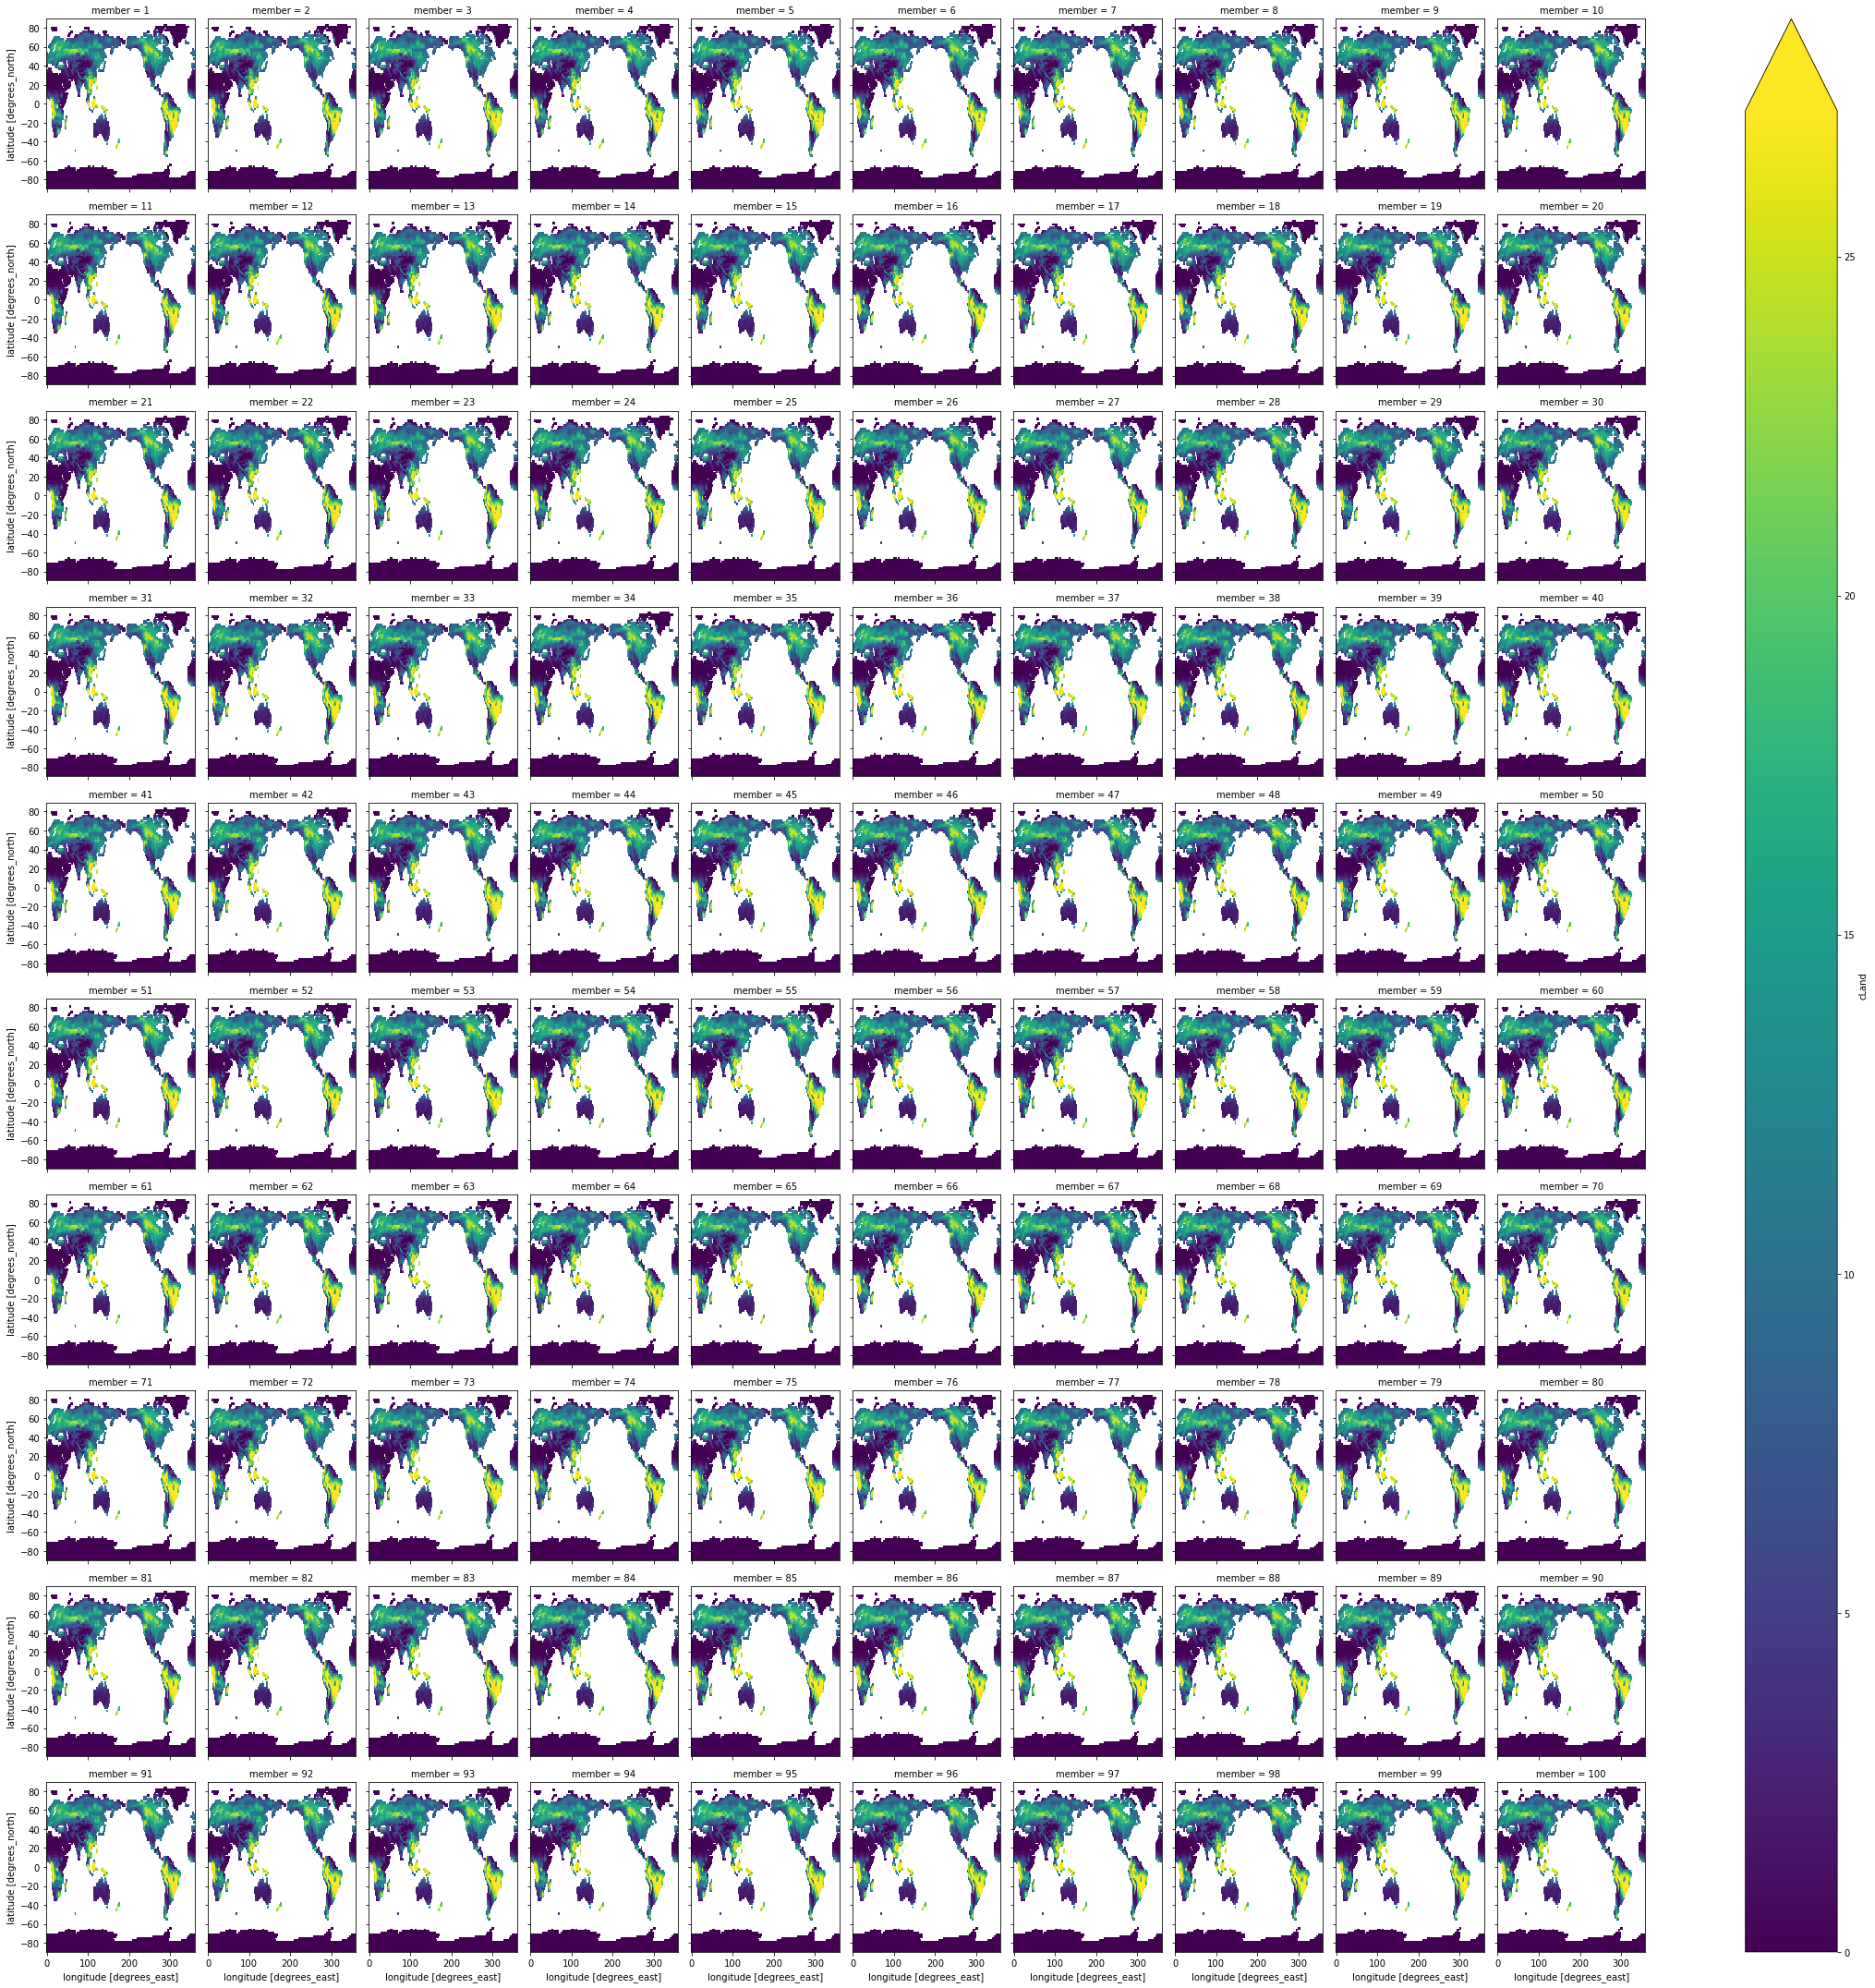

In [71]:
%time DS.isel(time=slice(0,5*12)).mean('time')['cLand'].plot(col='member',col_wrap=10,robust=True)